# 初识卷积神经网络——MNIST
## 1.课前碎碎念
MNIST--手写数字识别被很多人称作是深度学习的“Hello World！”
MNIST确实是一个简洁又简单的数据集，也是第一个深度学习算法解决的实际问题，
MNIST数据集很小，很适合教学实用，同时资源占用较少，没有GPU也能够进行训练。

我比较不喜欢“Hello World！”这个比喻，想要完全掌握MNIST，所需要的知识远不是敲进去一行代码就可以的。
实际上GAN最早被提出时，也是在MNIST数据集上做的验证。

在我有限的知识背景下，中心损失函数也是使用MNIST进行验证的。

——江小河  课前碎碎念

## 2.使用Keras编写Lenet
首先我们导入算法框架工具包

In [1]:
import tensorflow.keras as K
# import keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

我这里首先使用tensorflow后端的Keras进行讲解，注意这里我使用tensorflow.keras来引入keras。这是因为至少从1.9.0版本以后，tensorflow已经讲keras默认继承安装在了tensorflow包中。很多keras的教程会要求分别安装tensorflow和keras，通过import keras来导入。实际上没有任何区别（目前没有发现任何区别）

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def check_dimension(data, data_name):
    assert type(data) is np.ndarray
    print(data_name+"`s shape is " + str(data.shape))

check_dimension(x_train, "x_train")
check_dimension(y_train, "y_train")
check_dimension(x_test, "x_test")
check_dimension(y_test, "y_test")

x_train`s shape is (60000, 28, 28)
y_train`s shape is (60000,)
x_test`s shape is (10000, 28, 28)
y_test`s shape is (10000,)


Num 2251 is an image for 2.
Num 7334 is an image for 7.


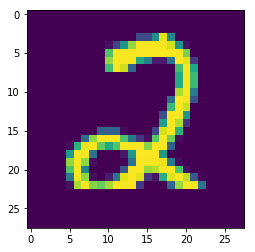

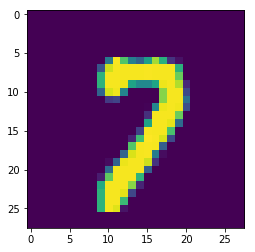

In [4]:
def check_example(x, y, number=None):
    if number == None:
        number = np.random.randint(x.shape[0])
    print("Num {} is an image for {}.".format(number, y[number]))
    plt.figure()
    plt.imshow(x[number])

check_example(x_train, y_train)
check_example(x_test, y_test)

In [5]:
from tensorflow.keras.backend import one_hot
y_train = K.backend.eval(one_hot(y_train, 10))
y_test= K.backend.eval(one_hot(y_test, 10))

In [6]:
check_dimension(x_train, "x_train")
check_dimension(y_train, "y_train")
check_dimension(x_test, "x_test")
check_dimension(y_test, "y_test")

x_train`s shape is (60000, 28, 28)
y_train`s shape is (60000, 10)
x_test`s shape is (10000, 28, 28)
y_test`s shape is (10000, 10)


In [7]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

导入Lenet模型图，作为创建网络的参考

![Lenet](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1559582032465&di=4a4061c5062506fc7a4a4d605d2e2443&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2F4lN1XOZshffJhuEYgHmB6aNaASYT9xjqANHsYIBsibQdynicOGUkqgNHBMbX0LHLhCiaswHvE0IltaZFIPWNJia9Yw%2F640%3Fwx_fmt%3Dpng)

In [8]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, kernel_size=(5, 5), padding="valid", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

查看网络摘要，和Lenet进行对比

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

编译模型（设置优化器，优化参数）

## 3.训练模型

In [10]:
adam = K.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

设置mini_batch

In [11]:
def gen_mini_batch():
    pass
#keras 的训练函数可以进行batchsize的设置

In [12]:
x_train = K.backend.eval(K.backend.expand_dims(x_train, axis=-1))
x_test = K.backend.eval(K.backend.expand_dims(x_test, axis=-1))

训练模型

In [13]:
history_lenet_0 = model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 4.9886 - acc: 0.6310
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 2.8749 - acc: 0.7849
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.7014 - acc: 0.8656
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1667 - acc: 0.9530
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1026 - acc: 0.9699
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0773 - acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0609 - acc: 0.9809
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0507 - acc: 0.9839
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0390 - acc: 0.9876
Epoch 10/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0334 - acc: 0.9895

In [14]:
type(history_lenet_0)

tensorflow.python.keras.callbacks.History

In [15]:
history_lenet_0.history

{'acc': [0.63105,
  0.7848666666666667,
  0.8655666666666667,
  0.9530333333333333,
  0.9698666666666667,
  0.97715,
  0.9808666666666667,
  0.98385,
  0.9875666666666667,
  0.9895333333333334],
 'loss': [4.9886281859079995,
  2.874903715361158,
  1.7013616485993068,
  0.16671033395106594,
  0.10262458098257582,
  0.07733857481703162,
  0.06088597701191902,
  0.05070152205657214,
  0.03901577026611194,
  0.033391790681891145]}

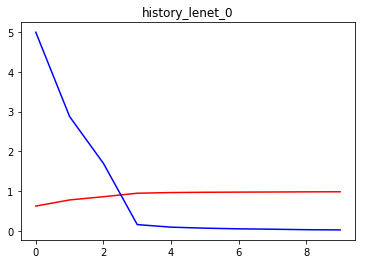

In [16]:
plt.title("history_lenet_0")
plt.plot(history_lenet_0.history['acc'], c='r')
plt.plot(history_lenet_0.history['loss'], c='b')

## 4.测试模型

In [17]:
#使用模型在测试集上进行预测，生成结果为numpy.ndarray, shape=(10000, 10)
y_test_predict = model.predict(x_test)
#使用np.argmax可以求得预测样本标签，e.g. 1,2,3,...9
y_label_pre = np.argmax(y_test_predict, axis=-1)
#求测试准确度
test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
test_acc

0.978

** 记住这个数字， 我们要得到比这个更高的结果 **

## 5.TODO List

### 1.修改网络参数进行测试，争取得到更好的结果。
    如：网络深度，卷积核个数，卷积核尺寸，池化尺寸，全连接隐藏层节点数，归一化操作，batchsize，学习率，正则化参数……
    （挑学会了的看懂了的改……）
### 2.在修改网络之前，手推一遍自己的网络输出尺寸，参数量大小，使用summary函数进行验证。
### 3.（选做）扩充版QMNIST数据集
    github上推出了扩充版的MNIST数据集，下载并进行测试。
    传送门：https://github.com/facebookresearch/qmnist
    （可能需要GPU）

## 1> 绘制loss曲线

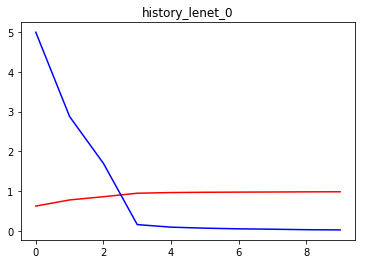

In [18]:
plt.title("history_lenet_0")
plt.plot(history_lenet_0.history['acc'], c='r')
plt.plot(history_lenet_0.history['loss'], c='b')

## 2>修改网络结构——使用卷积stride=2代替池化

In [19]:
model_test_1 = Sequential()
model_test_1.add(Conv2D(6, kernel_size=(5, 5), padding="same", strides=(2, 2), activation="relu", input_shape=(28,28,1)))

model_test_1.add(Conv2D(16, kernel_size=(5, 5), padding="valid", strides=(2, 2), activation="relu"))

model_test_1.add(Flatten())
model_test_1.add(Dense(120, activation="relu"))
model_test_1.add(Dense(84, activation="relu"))
model_test_1.add(Dense(10, activation="softmax"))

model_test_1.summary()

adam = K.optimizers.Adam(lr=0.0001)
model_test_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 6)         156       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 16)          2416      
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                850       
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_model_test_1 = model_test_1.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 3.4846 - acc: 0.6715
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3858 - acc: 0.9062
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2463 - acc: 0.9343
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1800 - acc: 0.9498
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1398 - acc: 0.9602
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1114 - acc: 0.9679
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0912 - acc: 0.9735
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0756 - acc: 0.9773
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0630 - acc: 0.9812
Epoch 10/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0521 - acc: 0.9842

In [34]:
def test_model(model):  

    #使用模型在测试集上进行预测，生成结果为numpy.ndarray, shape=(10000, 10)
    y_test_predict = model.predict(x_test)
    #使用np.argmax可以求得预测样本标签，e.g. 1,2,3,...9
    y_label_pre = np.argmax(y_test_predict, axis=-1)
    #求测试准确度
    test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
    return test_acc

In [35]:
test_model(model_test_1)

0.9724

** 效果明显不如之前 **

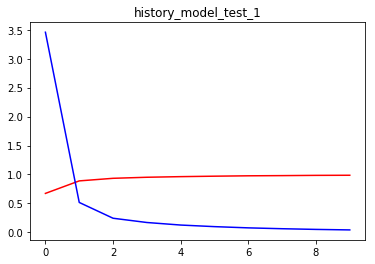

In [36]:
plt.title("history_model_test_1")
plt.plot(history_model_test_1.history['acc'], c='r')
plt.plot(history_model_test_1.history['loss'], c='b')

## 3>filter=3,4的池化

In [45]:
model_test_2 = Sequential()
model_test_2.add(Conv2D(6, kernel_size=(5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
model_test_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model_test_2.add(Conv2D(16, kernel_size=(5, 5), padding="valid", activation="relu"))
model_test_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model_test_2.add(Flatten())
model_test_2.add(Dense(120, activation="relu"))
model_test_2.add(Dense(84, activation="relu"))
model_test_2.add(Dense(10, activation="softmax"))

model_test_2.summary()

adam = K.optimizers.Adam(lr=0.0001)
model_test_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history_model_test_2 = model_test_2.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_19 (Dense)             (None, 84)                10164     
__________

0.9699


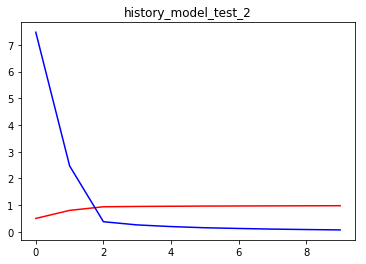

In [46]:
print(test_model(model_test_2))
plt.title("history_model_test_2")
plt.plot(history_model_test_2.history['acc'], c='r')
plt.plot(history_model_test_2.history['loss'], c='b')

** 更差一些 **

In [47]:
model_test_3 = Sequential()
model_test_3.add(Conv2D(6, kernel_size=(5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
model_test_3.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2), padding='same'))
model_test_3.add(Conv2D(16, kernel_size=(5, 5), padding="valid", activation="relu"))
model_test_3.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2), padding='same'))
model_test_3.add(Flatten())
model_test_3.add(Dense(120, activation="relu"))
model_test_3.add(Dense(84, activation="relu"))
model_test_3.add(Dense(10, activation="softmax"))

model_test_3.summary()

adam = K.optimizers.Adam(lr=0.0001)
model_test_3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history_model_test_3 = model_test_3.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_22 (Dense)             (None, 84)                10164     
__________

0.976


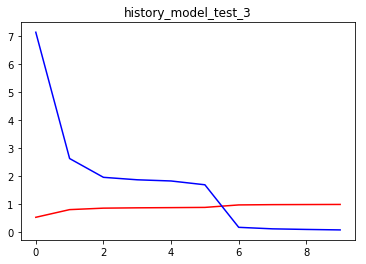

In [49]:
print(test_model(model_test_3))
plt.title("history_model_test_3")
plt.plot(history_model_test_3.history['acc'], c='r')
plt.plot(history_model_test_3.history['loss'], c='b')

### 分析：
较大的池化视野对于Lenet有副作用，可能是Lenet输入特征图尺寸较小，感受野变大后图像特征互相干扰

## 4>修改网络结构——提升性能

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 32)        3488      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
flatten_12 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 120)               188280    
__________

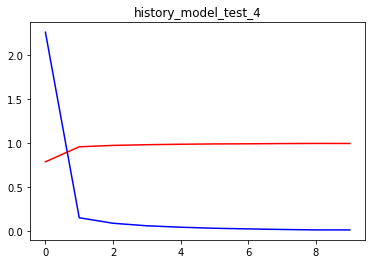

In [54]:
model_test_4 = Sequential()
model_test_4.add(Conv2D(12, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28,28,1)))
model_test_4.add(MaxPooling2D((2,2)))
model_test_4.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model_test_4.add(MaxPooling2D((2,2)))
model_test_4.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model_test_4.add(Flatten())
model_test_4.add(Dense(120, activation="relu"))
model_test_4.add(Dense(84, activation="relu"))
model_test_4.add(Dense(10, activation="softmax"))

model_test_4.summary()

adam = K.optimizers.Adam(lr=0.0001)
model_test_4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history_model_test_4 = model_test_4.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True)

print(test_model(model_test_4))
plt.title("history_model_test_4")
plt.plot(history_model_test_4.history['acc'], c='r')
plt.plot(history_model_test_4.history['loss'], c='b')

![](20190604164909.jpg,width=320, heigth=240)

![](20190604170500-1.png)